# Decision Trees

<img src = "data/DT1.png">

<img src = "data/DT2.png">

<img src = "data/DT3.png">

In [40]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Assuming you have a CSV file with your data

file_path = 'data\golf_data.csv'
data = pd.read_csv(file_path)

In [43]:
# Assuming 'PlayTennis' is your target variable
X = data[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y = data['PlayTennis']

In [44]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)


In [50]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)


In [51]:
# Create a Decision Tree classifier with 'entropy' criterion
classifier = DecisionTreeClassifier(criterion='entropy')

# Train the classifier on the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [52]:
# Make predictions on the test set
y_test_pred = classifier.predict(X_test)

In [53]:
# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6


In [54]:
# Generate a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion_matrix)


Confusion Matrix:
 [[3 0]
 [4 3]]


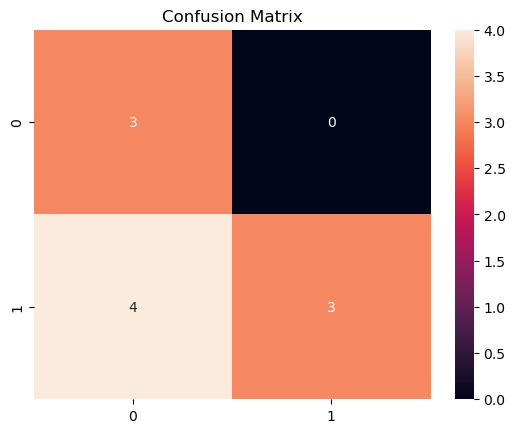

In [55]:
# Plot a heatmap for the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

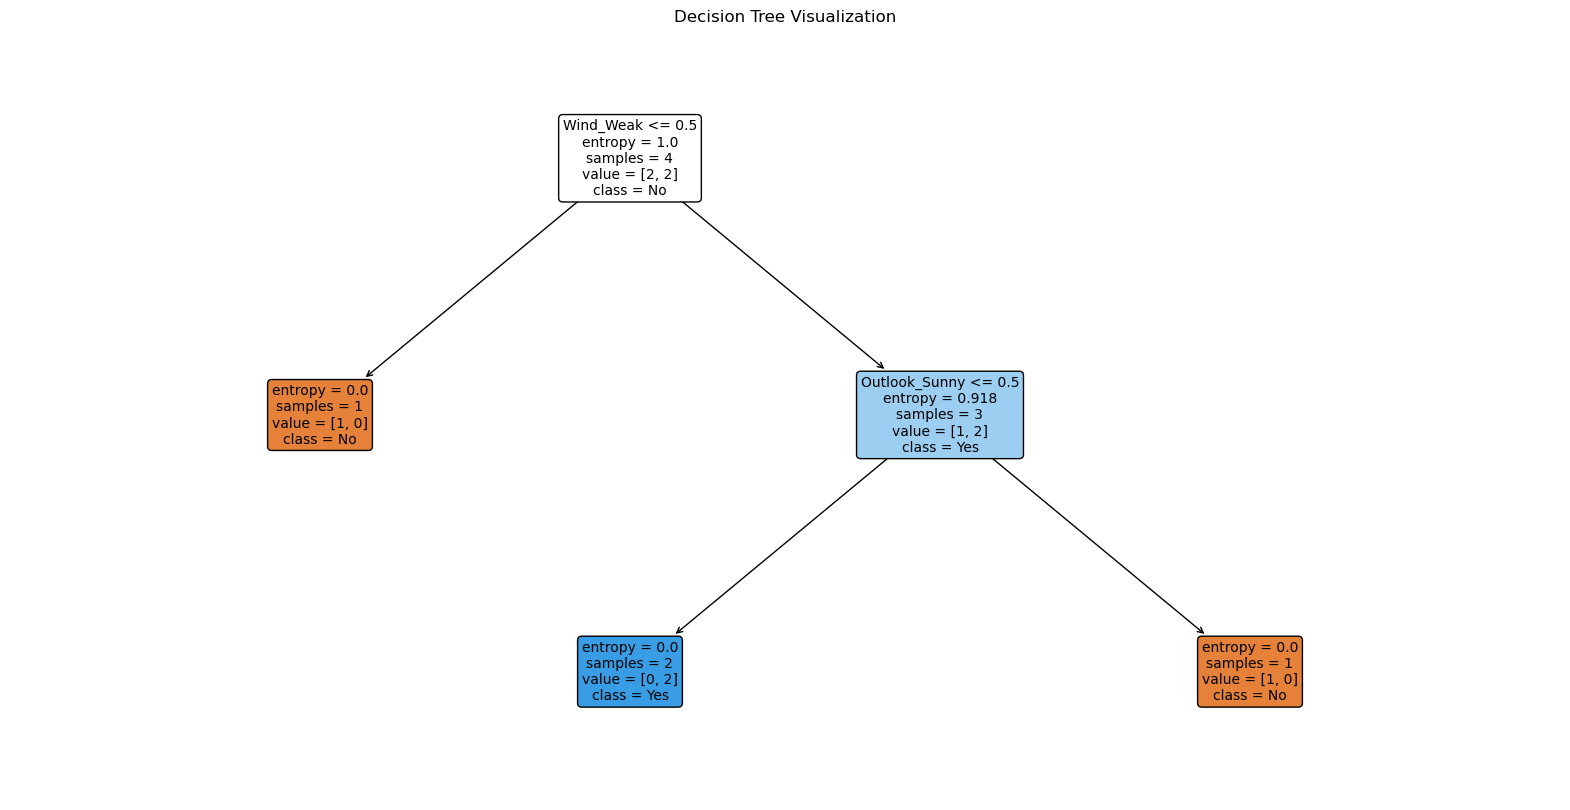

In [56]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(classifier, feature_names=X.columns, class_names=classifier.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

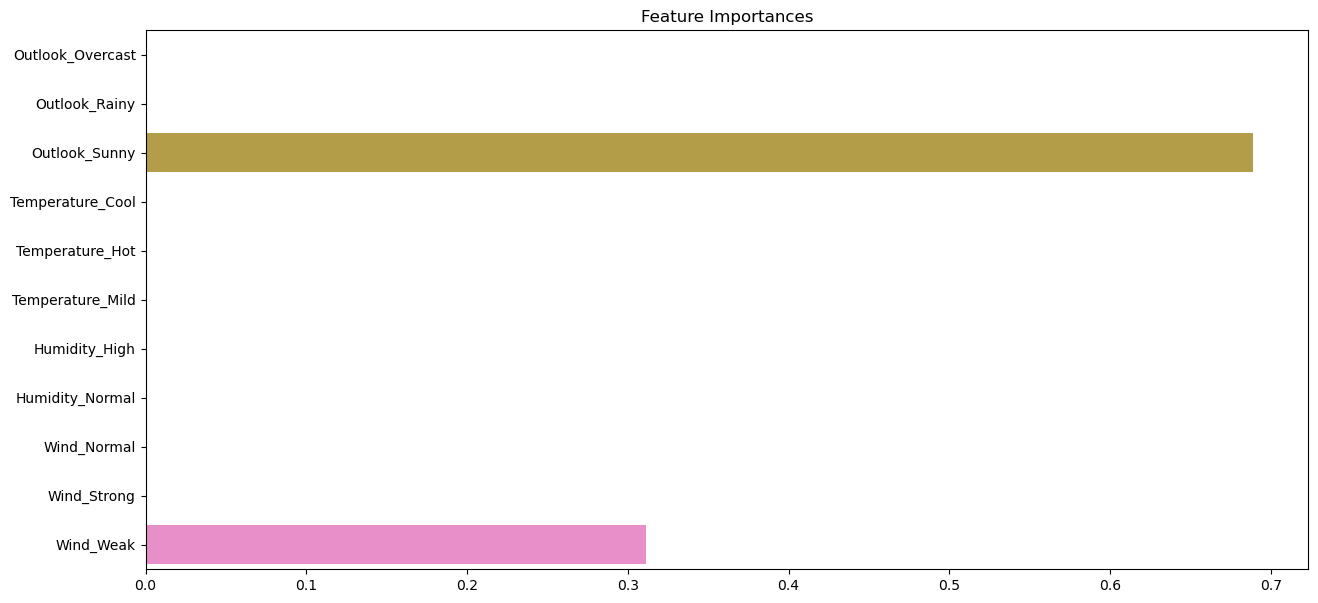

In [57]:
# Display feature importances using a bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x=classifier.feature_importances_, y=X.columns)
plt.title("Feature Importances")
plt.show()

# Decision Trees ( criterioin = "gini")

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [20]:
# Load the Iris dataset
iris = pd.read_csv('data/iris.csv')

In [21]:
# Display the shape and column names of the dataset
print("Dataset shape:", iris.shape)
print("Column names:", iris.columns)

Dataset shape: (150, 6)
Column names: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


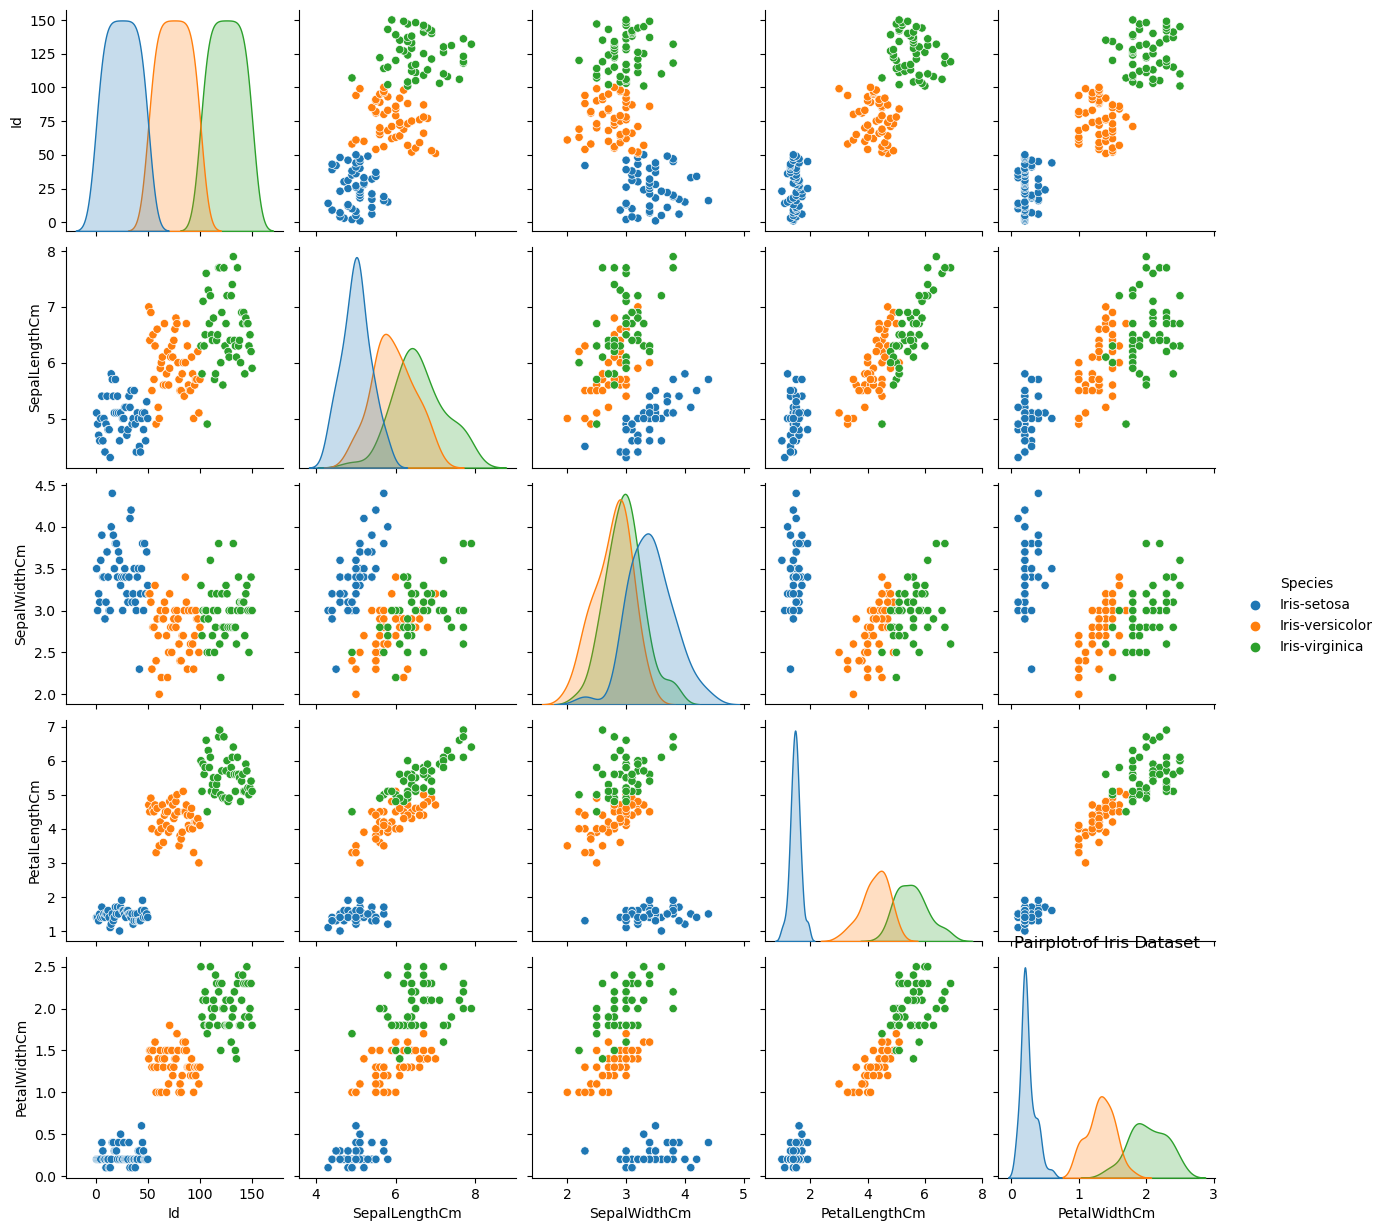

In [22]:
# Visualize pairwise relationships in the dataset using a pairplot
sns.pairplot(iris, hue='Species')
plt.title("Pairplot of Iris Dataset")
plt.show()

In [23]:
# Extract features (X) and target variable (y)
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']


In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [33]:
# Initialize and train a Decision Tree classifier with a maximum depth of 2
classifier = DecisionTreeClassifier(max_depth=2,criterion="gini")
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [34]:
# Make predictions on the test set
y_test_pred = classifier.predict(X_test)


In [35]:
# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8947368421052632


In [36]:
# Generate a confusion matrix to evaluate the performance of the classifier
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]


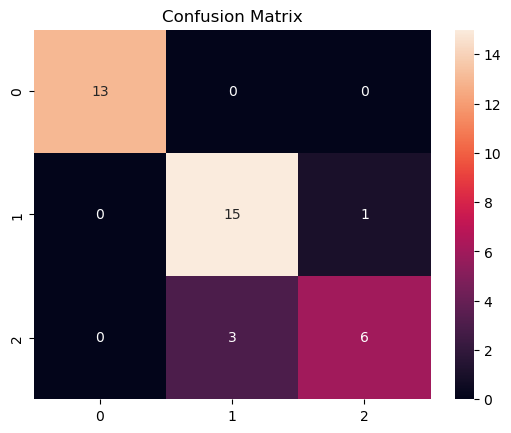

In [37]:
# Plot a heatmap for the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

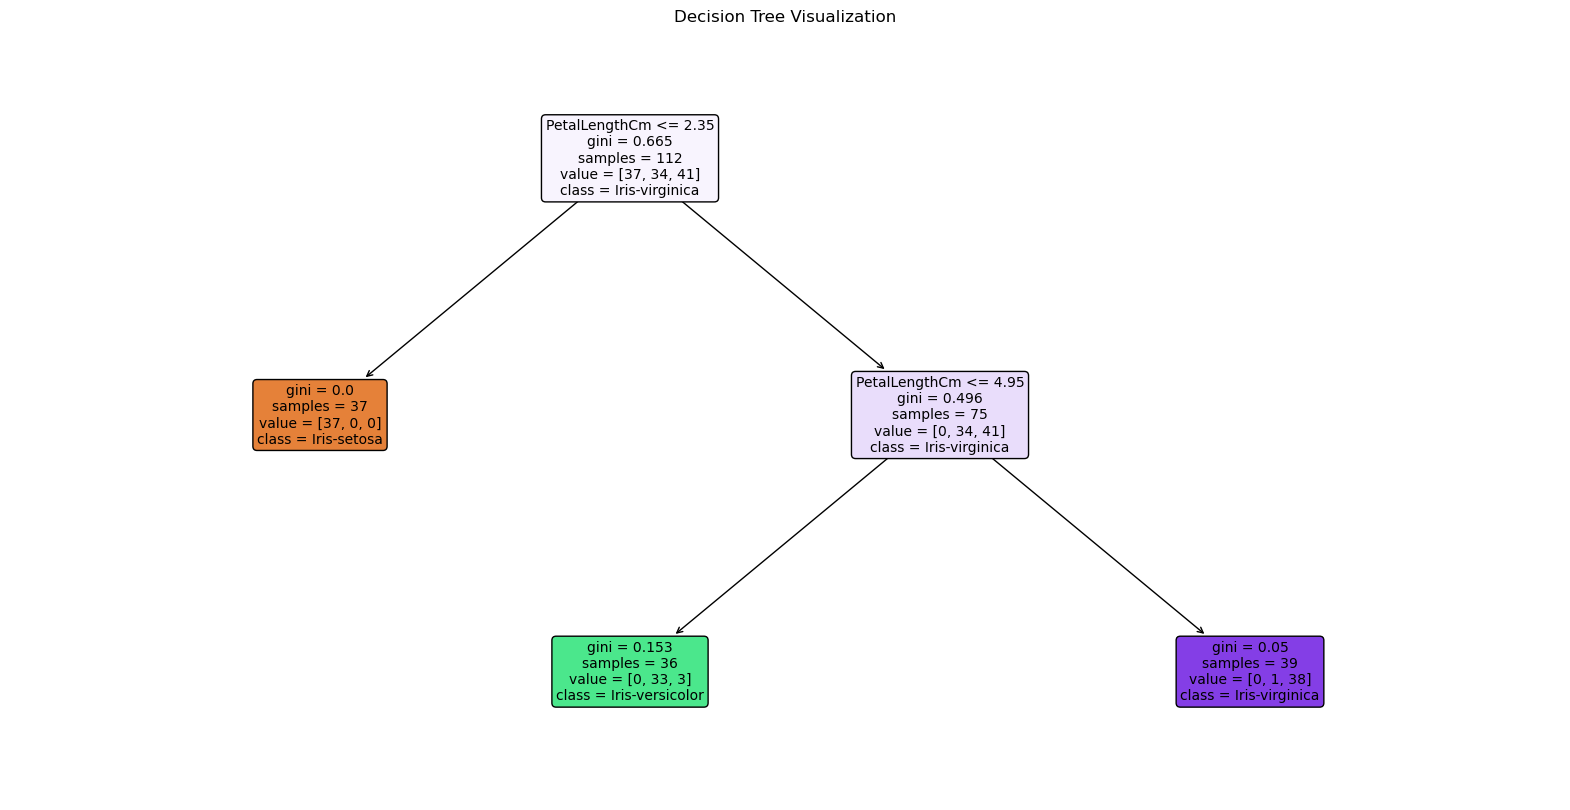

In [38]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(classifier, feature_names=X_train.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


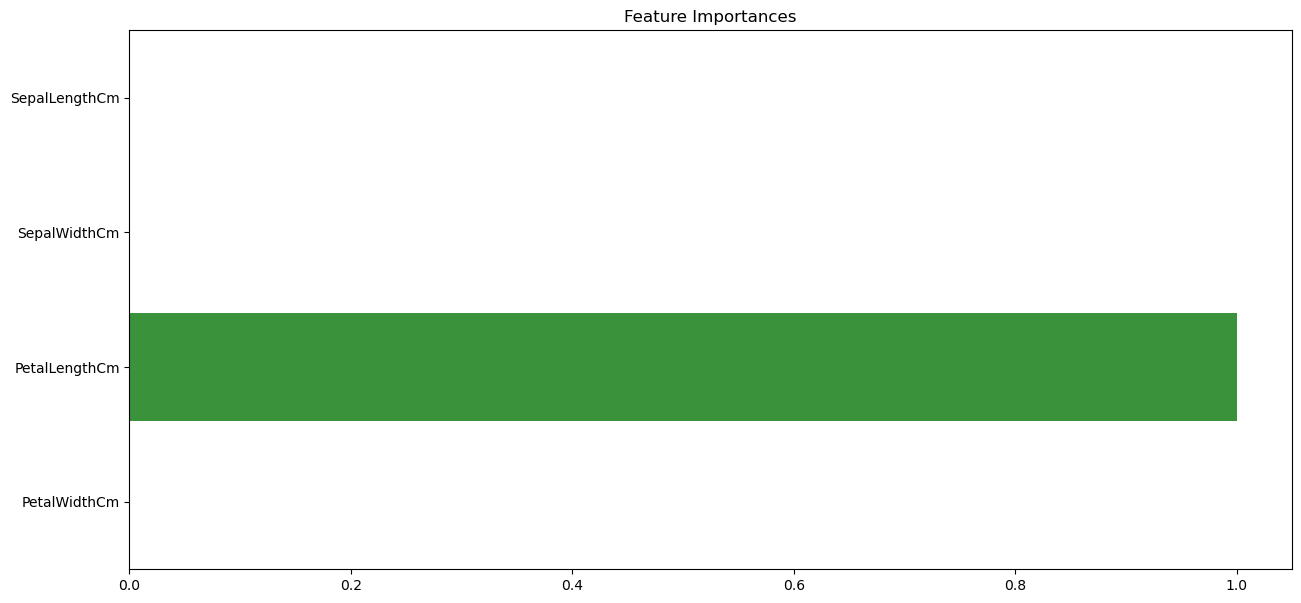

In [39]:
# Display feature importances using a bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x=classifier.feature_importances_, y=X_train.columns)
plt.title("Feature Importances")
plt.show()

# Fine Tuning

Fine-tuning a decision tree involves adjusting various parameters and techniques to improve the model's performance, reduce overfitting, and increase its ability to generalize to unseen data. Here are some of the common fine-tuning methods:

<h2>1. Max Depth </h2>

&emsp;&emsp;Description: The maximum depth of the tree limits how deep the tree can grow.

&emsp;&emsp;Purpose: Prevents the tree from growing too complex and overfitting the training data.

&emsp;&emsp;Example: Setting max_depth=5 means the tree can only split up to 5 levels.

<h2>2. Min Samples Split </h2>

&emsp;&emsp;Description: The minimum number of samples required to split an internal node.
Purpose: Controls when to stop splitting nodes. If a node has fewer samples than this parameter, it will not be split.

&emsp;&emsp;Example: Setting min_samples_split=10 means a node must have at least 10 samples to consider splitting.

<h2>3. Min Samples Leaf</h2>

&emsp;&emsp;Description: The minimum number of samples required to be at a leaf node.

&emsp;&emsp;Purpose: Prevents the creation of leaf nodes with very few samples, reducing the risk of overfitting.

&emsp;&emsp;Example: Setting min_samples_leaf=5 ensures that each leaf node has at least 5 samples.

<h2>4. Max Features</h2>

&emsp;&emsp;Description: The number of features to consider when looking for the best split.

&emsp;&emsp;Purpose: Reduces the complexity of the model and introduces randomness, which can improve generalization.

&emsp;&emsp;Example: Setting max_features='sqrt' means only the square root of the total number of features is considered for each split.

<h2>5. Max Leaf Nodes</h2>

&emsp;&emsp;Description: The maximum number of leaf nodes in the tree.

&emsp;&emsp;Purpose: Limits the number of leaf nodes, which controls the size of the tree and helps prevent overfitting.

&emsp;&emsp;Example: Setting max_leaf_nodes=10 means the tree will be pruned to ensure no more than 10 leaf nodes.

<h2>6. Criterion</h2>

&emsp;&emsp;Description: The function to measure the quality of a split.
Common Options:

&emsp;&emsp;&emsp;&emsp;Gini Impurity: Measures the impurity of a node, often used for classification.

&emsp;&emsp;&emsp;&emsp;Entropy: Measures the information gain, another method for classification.

&emsp;&emsp;Purpose: The choice between Gini impurity and entropy can slightly influence the tree structure.

&emsp;&emsp;Example: Setting criterion='entropy' will use information gain as the splitting criterion.

<h2>7. Pruning</h2>

&emsp;&emsp;Description: The process of removing sections of the tree that provide little power in classifying instances.

&emsp;&emsp;Purpose: Reduces overfitting by trimming the tree.
Types:

&emsp;&emsp; - Pre-Pruning (Early Stopping): Stops the tree from growing once it meets certain criteria (like max_depth or min_samples_split).

&emsp;&emsp;- Post-Pruning: Removes branches from the fully grown tree that have little significance.

<h2>8. Class Weight</h2>

&emsp;&emsp;Description: Adjusts the weights of classes to handle imbalanced datasets.
Purpose: Helps in situations where one class is more frequent than the other, balancing the influence of each class.

&emsp;&emsp;Example: Setting class_weight='balanced' automatically adjusts weights inversely proportional to class frequencies.

<h2>9. Cross-Validation</h2>

&emsp;&emsp;Description: Splitting the data into several subsets and training/testing on these subsets.

&emsp;&emsp;Purpose: Helps in assessing how the tree generalizes to an independent dataset and in selecting the best hyperparameters.

<h2>10. Ensemble Methods</h2>
   
&emsp;&emsp;   Description: Combining multiple decision trees to improve the model's performance.
Types:

&emsp;&emsp;   Random Forest: An ensemble of decision trees where each tree is trained on a random subset of features and data.
   
&emsp;&emsp;   Boosting: Sequentially building trees where each tree tries to correct the errors of the previous ones (e.g., Gradient Boosting).
Purpose: Improves accuracy and reduces overfitting compared to a single decision tree.

<h2>11. Feature Selection</h2>

&emsp;&emsp;Description: Selecting the most relevant features to train the model.

&emsp;&emsp;Purpose: Reduces the model's complexity and increases interpretability.
Method: Can be done manually, using algorithms like Recursive Feature Elimination (RFE), or based on feature importance scores.


<h2>12. Handling Missing Values</h2>
&emsp;&emsp; Description: Decide how to handle missing values in the dataset (e.g., imputation, skipping).


&emsp;&emsp; Purpose: Ensures the model can effectively deal with incomplete data.
By fine-tuning these parameters and techniques, you can significantly improve the performance and robustness of a decision tree model. The goal is to balance the tree's complexity with its ability to generalize well to new data.






